#**PRAKTIKUM 6 - MACHINE LEARNING (SVM)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi

#**1. Import Library**

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import library yang mendukung dalam menganalisis datanya

Kode di bawah ini untuk menghubungkan colab dengan drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**2. Loading Dataset**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file iris.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [3]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum06/data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Menampilkan informasi detail dengan df.info()**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Terdapat 3 type data dari 6 kolom, floast (4), int (1) dan object (1)

**Menampilkan statistika deskriptif dari dataset**

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Cek nilai pada kolom Species**

Perintah df["Species"].unique() digunakan untuk menampilkan daftar nilai unik pada kolom Species. Hasilnya menunjukkan bahwa dataset Iris memiliki tiga jenis bunga, yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica.

In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Menghitung jumlah pada kolom Species**

Selanjutnya, perintah df["Species"].value_counts() digunakan untuk menghitung jumlah data pada setiap kelas. Hasil yang ditampilkan menunjukkan bahwa masing-masing spesies memiliki 50 data, sehingga total keseluruhan adalah 150 data.

In [7]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Dari hasil ini dapat disimpulkan bahwa dataset Iris bersifat seimbang (balanced) karena setiap kelas
memiliki jumlah data yang sama, sehingga model SVM dapat dilatih tanpa bias terhadap salah satu kelas.

#**3. Pemilihan Fitur**

Pada tahap ini dilakukan pemisahan antara fitur (X) dan label (y).

In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Kolom target (label)
y = df['Species']

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


- Fitur (X) terdiri dari empat kolom numerik yaitu SepalLengthCm, SepalWidthCm, PetalLengthCm,
dan PetalWidthCm, yang akan digunakan sebagai input model.
- Sedangkan label (y) berisi kolom Species, yaitu target keluaran berupa jenis bunga: Iris-setosa, Iris-versicolor, dan Iris-virginica.

Tahap ini bertujuan agar model SVM dapat belajar membedakan setiap spesies bunga berdasarkan nilai
fitur-fiturnya.

#**4. Split dan Bangun Model SVM**

Pada tahap ini dataset dibagi menjadi data training (80%) dan data testing (20%) menggunakan fungsi
train_test_split(). Data training digunakan untuk melatih model, sedangkan data testing digunakan
untuk menguji performa model.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear') # kernel ini bisa pake 'polly', 'sigmoid' dll

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

SVC(kernel='linear')

Selanjutnya dibuat model Support Vector Machine (SVM) dengan kernel linear menggunakan
SVC(kernel='linear'). Model kemudian dilatih dengan data training menggunakan model.fit(X_train,
y_train) agar dapat mempelajari pola hubungan antara fitur dan label.
Tahapan ini merupakan dasar dari proses pembelajaran mesin di mana model mulai belajar membedakan
setiap kelas bunga berdasarkan data latih yang diberikan.

#**5. Evaluasi Akurasi dan Report Klasifikasi**

Tahap ini bertujuan untuk mengevaluasi performa model SVM yang telah dilatih. Proses dilakukan dengan
memprediksi data uji menggunakan perintah model.predict(X_test) dan menyimpan hasilnya ke variabel
y_pred.

In [12]:
y_pred = model.predict (X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Nilai akurasi dihitung dengan fungsi accuracy_score(y_test, y_pred), yang menunjukkan persentase
prediksi benar terhadap total data uji. Hasil menunjukkan akurasi 100%, menandakan bahwa model
mampu mengklasifikasikan semua data uji dengan tepat.
Selain itu, fungsi classification_report() digunakan untuk menampilkan metrik evaluasi lain seperti
precision, recall, dan f1-score untuk setiap kelas (Iris-setosa, Iris-versicolor, dan Iris-virginica). Ketiga
metrik tersebut juga bernilai sempurna (1.00), yang berarti model memiliki performa sangat baik dalam
mengenali setiap jenis bunga.

#**6. Confusion Matrix**

Tahap ini digunakan untuk menampilkan hasil klasifikasi model dalam bentuk Confusion Matrix, yaitu
tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
Kode confusion_matrix(y_test, y_pred) menghasilkan matriks perbandingan antara label sebenarnya
(True Labels) dan label hasil prediksi (Predicted Labels). Visualisasi dibuat menggunakan
seaborn.heatmap() agar lebih mudah dibaca.


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


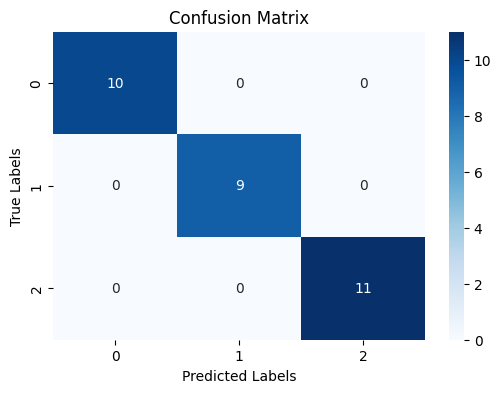

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion marrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatid)
# misalnya : class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Berdasarkan hasil yang ditampilkan, seluruh data uji terklasifikasi dengan benar pada diagonal utama
matriks (tanpa nilai kesalahan). Artinya, model SVM berhasil mengenali ketiga kelas bunga — Iris-setosa,
Iris-versicolor, dan Iris-virginica — dengan akurasi sempurna (100%).

#**7. Visualisasi Hasil Model SVM**

Tahap ini digunakan untuk menampilkan visualisasi sebaran data pada dataset Iris berdasarkan dua fitur
utama yaitu Sepal Length dan Sepal Width. Visualisasi dibuat menggunakan fungsi plt.scatter() dari
library Matplotlib, dengan warna titik (c) merepresentasikan masing-masing spesies bunga.


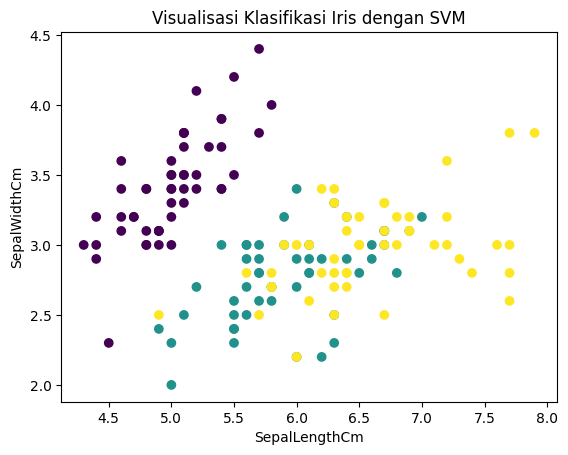

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.show()

Dari hasil grafik, terlihat bahwa setiap warna mewakili satu jenis bunga Iris yang berbeda. Titik-titik
berwarna ungu, hijau, dan kuning membentuk kelompok yang terpisah, menunjukkan bahwa fitur-fitur
tersebut cukup efektif dalam membedakan ketiga kelas bunga (Iris-setosa, Iris-versicolor, dan Iris
virginica).
Visualisasi ini membantu memverifikasi bahwa model SVM dapat mengklasifikasikan data dengan baik
karena batas antar kelas terlihat cukup jelas.

#**8. 3D Visualisasi Hasil Model SVM**

Tahap ini bertujuan untuk menampilkan hasil klasifikasi dataset Iris dalam bentuk grafik tiga dimensi (3D)
agar pola antar kelas terlihat lebih jelas.

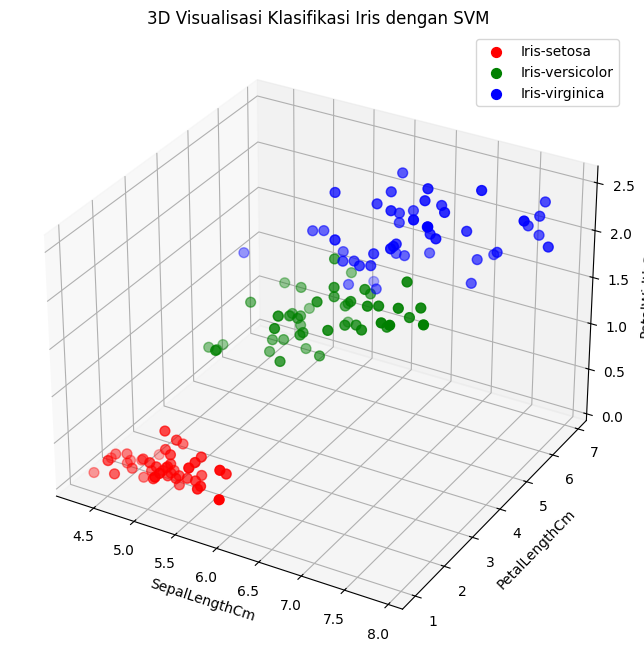

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# Get the unique species names for labels
labels = df['Species'].unique()

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
  subset = df[df['SpeciesEncoded'] == i]
  ax.scatter(
      subset['SepalLengthCm'],
      subset['PetalLengthCm'],
      subset['PetalWidthCm'],
      color=colors[i],
      label=species,
      s=50
  )

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()

Pertama, data label pada kolom Species diubah menjadi bentuk numerik menggunakan LabelEncoder agar
setiap spesies memiliki nilai angka berbeda. Kemudian dibuat visualisasi 3D menggunakan Axes3D dari
library Matplotlib.

Sumbu X, Y, dan Z masing-masing merepresentasikan fitur Sepal Length, Petal Length, dan Petal Width.
Setiap warna menandakan kelas bunga yang berbeda:

•   Iris-setosa

•   Iris-versicolor

•   Iris-virginica

Dari hasil plot, terlihat ketiga spesies bunga membentuk kelompok yang terpisah dengan jelas,
menandakan bahwa fitur-fitur pada dataset Iris sangat efektif digunakan oleh model SVM untuk
melakukan klasifikasi.